In [1]:
from scripts import support, insd, kuroda, nras, metrics, vectorization as v
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load base matrix
df = pd.read_excel("./data/tri-2011.xls", 'ТИоц', skiprows=1, index_col=2)
df = df.iloc[2:-11, 2:-13].astype(np.float)

# Load predicted matrix
pred_df = pd.read_excel("./data/tri-2016.xls", 'ТИоц', skiprows=1, index_col=2)
pred_df = pred_df.iloc[2:-12, 2:-13].astype(np.float)
shape = pred_df.shape

df.shape, pred_df.shape

((59, 59), (59, 59))

In [3]:
# Sums of rows\columns
sums_rows = pred_df.sum(axis=1).values.reshape(-1, 1)
sums_cols = pred_df.sum(axis=0).values.reshape(-1, 1)

# Vectorization of matrixa
vect_a = v.tovector(df.values)
vect_a

array([[7.02865e+05],
       [8.83000e+02],
       [6.40000e+01],
       ...,
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00]])

In [4]:
# Merge column of constraints
c = np.append(sums_rows,sums_cols,axis=0)
print(c.shape)

# Create matrix G of coefficients of constraints 
G = v.addrows(shape,sparsed=True) # Use "sparsed" parameter everywhere if want use fast sparsed matrix
G = v.addcolumns(shape,G,sparsed=True) # Use "sparsed" parameter everywhere if want use fast sparsed matrix
G.toarray()

(118, 1)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

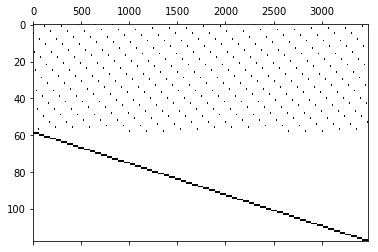

In [6]:
# Look on the distribution of 0s and 1s in matrix of coefficients G
plt.spy(G.toarray(),aspect='auto')

In [7]:
# Run method of projection - INSD(~201 ms) and got metrics and result matrix 
res_df = insd.insd(aa=vect_a,c=c, G=G,sparsed=True) # Use "sparsed" parameter everywhere if want use fast sparsed matrix
print("\nMetrics:")
metrics.get_values(res_df,pred_df.values)
print("\nResult matrix:")
pd.DataFrame(v.tomatrix(res_df)).round(3).head()

Using license file C:\Users\Asus\gurobi.lic
Academic license - for non-commercial use only
Parameter BarConvTol unchanged
   Value: 1e-08  Min: 0.0  Max: 1.0  Default: 1e-08
Parameter BarQCPConvTol unchanged
   Value: 1e-06  Min: 0.0  Max: 1.0  Default: 1e-06
Changed value of parameter DualReductions to 0
   Prev: 1  Min: 0  Max: 1  Default: 1

Metrics:
N0 451
PSISTAT 0.0146
RSQ 0.9799
MAPE 106.9969
SWAD 0.0955
WAPE 15.9572

Result matrix:


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1148878.585,1071.078,708.870,5.591,278.571,0.0,7.853,159.799,2119637.642,63271.385,...,1623.095,1373.313,49999.346,5631.706,29283.636,183.446,1126.099,2432.000,5148.635,0.0
1,1361.274,24125.982,1.640,240.807,180.279,0.0,26.598,21.528,498.805,0.000,...,20.843,114.162,7771.636,164.357,328.946,17.862,30.299,244.346,175.189,0.0
2,84.292,0.000,6567.301,0.000,0.000,0.0,1.253,0.000,94872.347,0.000,...,83.014,17.784,750.176,9.952,405.977,1.264,46.678,147.512,0.000,0.0
3,1953.567,10.903,66.529,133447.623,516.833,0.0,405.372,169.443,2103.495,0.000,...,38.543,342.235,3044.957,459.873,2777.716,162.216,28.562,274.785,255.883,0.0
4,391.742,0.000,0.000,610.588,456283.867,0.0,0.000,307.927,154.246,0.000,...,9.653,8154.118,0.000,0.000,18.362,3.589,0.000,0.000,0.000,0.0


In [8]:
# Run method of projection - NRAS(~181 ms) and got metrics and result matrix 
res_df = nras.nras(G=G,aa=vect_a,c=c,accuracy=0.01, limit = 100,sparsed=True)
print("\nMetrics:")
metrics.get_values(res_df,pred_df.values)

27

Metrics:
N0 450
PSISTAT 0.0142
RSQ 0.9806
MAPE 105.1074
SWAD 0.0935
WAPE 15.6903


In [9]:
# Run method of projection - Kuroda(~331 ms) and got metrics and result matrix
res_df = kuroda.kuroda(G=G,aa=vect_a,c=c,mtype=2,sparsed=True)
print("\nMetrics:")
metrics.get_values(res_df,pred_df.values)

Parameter BarConvTol unchanged
   Value: 1e-08  Min: 0.0  Max: 1.0  Default: 1e-08
Parameter BarQCPConvTol unchanged
   Value: 1e-06  Min: 0.0  Max: 1.0  Default: 1e-06
Parameter DualReductions unchanged
   Value: 1  Min: 0  Max: 1  Default: 1

Metrics:
N0 530
PSISTAT 0.0372
RSQ 0.9732
MAPE 633.9209
SWAD 0.1016
WAPE 21.113
